In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# np.set_printoptions(precision=3, floatmode='fixed')

In [2]:
rng = np.random.RandomState(0)

n_samples, n_features = 50, 300
freqs = np.arange(n_features)
tt = np.zeros(6, 'i')
for j in range(6):
    tt[j] = (j+1) * n_features // 7
T = 5*np.random.random((n_samples,6))
print(tt)

[ 42  85 128 171 214 257]


In [3]:
X = np.zeros((n_samples, n_features))

X += 5*np.exp(-0.005* np.arange(n_features, dtype='d'))

for i in range(n_features):
    X[:, i] += T[:,0]*np.exp( -abs((freqs[i] - tt[0])**2 / 230)) + 0.1 * rng.normal(0, 1, n_samples)
    X[:, i] += T[:,1]*np.exp( -abs((freqs[i] - tt[1])**2 / 200)) + 0.1 * rng.normal(0, 1, n_samples)
    X[:, i] += T[:,2]*np.exp( -abs((freqs[i] - tt[2])**2 / 200)) + 0.1 * rng.normal(0, 1, n_samples)
    X[:, i] += T[:,3]*np.exp( -abs((freqs[i] - tt[3])**2 / 240)) + 0.1 * rng.normal(0, 1, n_samples)
    X[:, i] += T[:,4]*np.exp( -abs((freqs[i] - tt[4])**2 / 200)) + 0.1 * rng.normal(0, 1, n_samples)
    X[:, i] += T[:,5]*np.exp( -abs((freqs[i] - tt[5])**2 / 150)) + 0.1 * rng.normal(0, 1, n_samples)

xs = X[0]

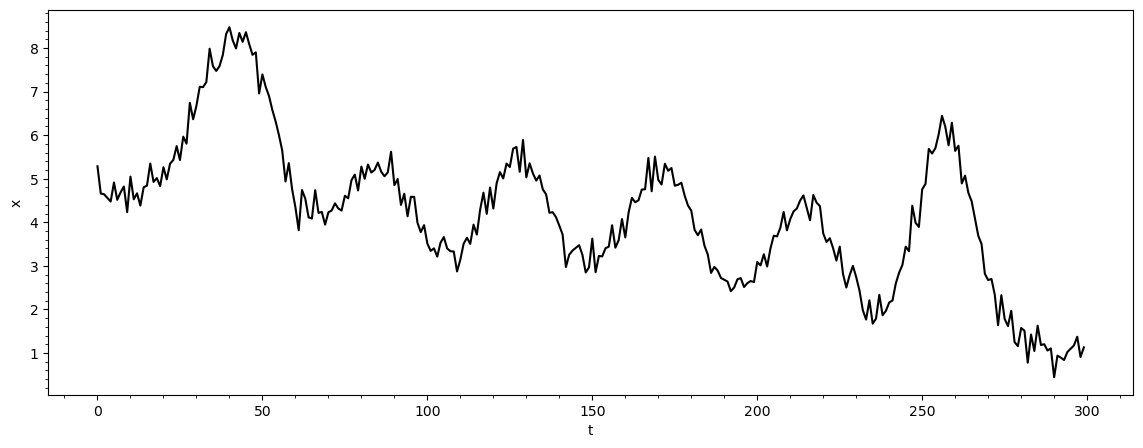

In [4]:
plt.figure(figsize=(14,5))
plt.plot(xs, linewidth=1.5, color='k')
plt.ylabel('x')
plt.xlabel('t')
plt.minorticks_on()
plt.show()

In [5]:
import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.avragg as avragg
import mlgrad.array_transform as array_transform
import mlgrad.loss as loss
import mlgrad.regr as regr
import mlgrad.af as af
import mlgrad.smooth as smooth

In [6]:
tau = 100.
solver = "scipy"
# xs_ = np.pad(xs, 10, mode='edge')
zs = smooth.whittaker_smooth(xs, tau=tau, solver=solver)

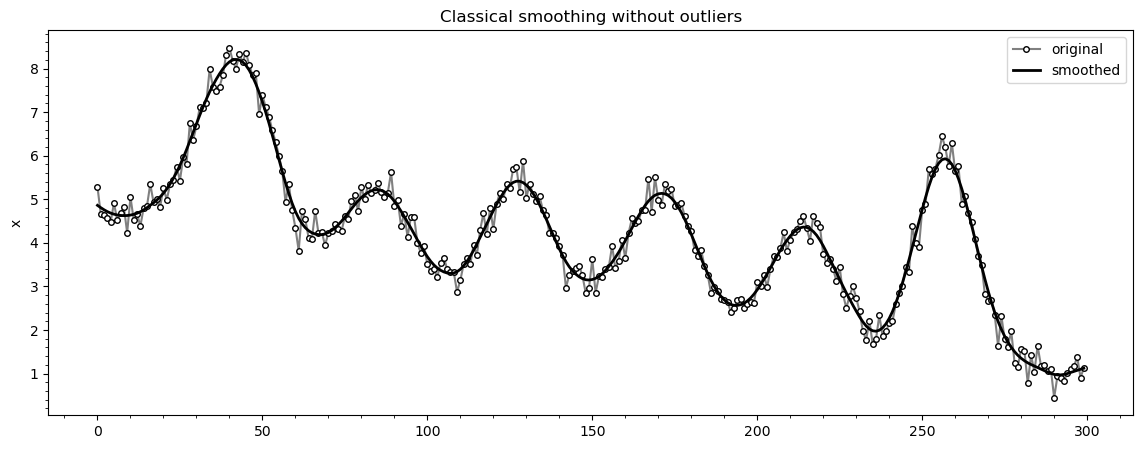

In [7]:
plt.figure(figsize=(14,5))
plt.title("Classical smoothing without outliers")
plt.plot(xs, linewidth=1.5, color='Gray', marker='o', markersize=4, 
         markerfacecolor='w', markeredgecolor='k',label='original')
plt.plot(zs, linewidth=2.0, color='k', label=r'smoothed')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.legend()
plt.show()

In [8]:
ts_o = np.random.randint(0, n_features, 30)
xs_o = xs.copy()
for t in ts_o:
    xs_o[t] += 4.

In [9]:
zs_o = smooth.whittaker_smooth(
    xs_o,
    tau=tau, solver=solver)

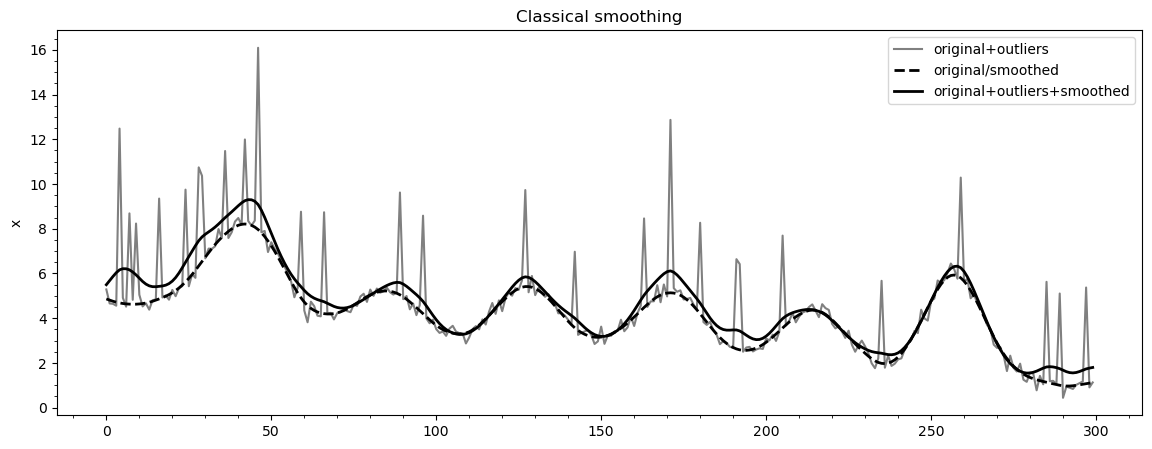

In [10]:
plt.figure(figsize=(14,5))
plt.title("Classical smoothing")
plt.plot(xs_o, linewidth=1.5, color='Gray', label='original+outliers')
plt.plot(zs, linewidth=2.0, color='k', linestyle='--', label='original/smoothed')
plt.plot(zs_o, linewidth=2.0, color='k', label='original+outliers+smoothed')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.legend()
plt.show()

In [11]:
zs2 = smooth.whittaker_smooth_ex(
                xs_o,
                aggfunc=af.averaging_function("WM", 
                        funcs.QuantileFunc(0.90, funcs.SoftAbs_Sqrt(0.001))),  
                tau=tau, solver=solver)

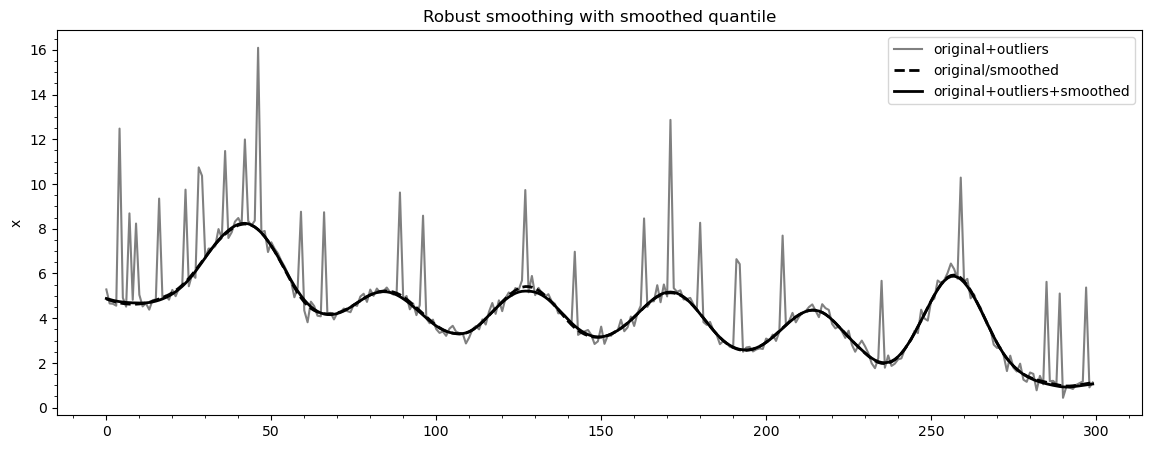

In [12]:
plt.figure(figsize=(14,5))
plt.title("Robust smoothing with smoothed quantile")
plt.plot(xs_o, linewidth=1.5, color='Gray', label='original+outliers')
plt.plot(zs, linewidth=2.0, color='k', linestyle='--', label='original/smoothed')
plt.plot(zs2, linewidth=2.0, color='k', label=r'original+outliers+smoothed')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.legend()
plt.show()

In [17]:
alpha = 3.5
zs3 = smooth.whittaker_smooth_ex(
                xs_o,
                aggfunc=af.averaging_function("WMZ", kwds={"alpha":alpha}),  
                tau=tau, solver=solver)

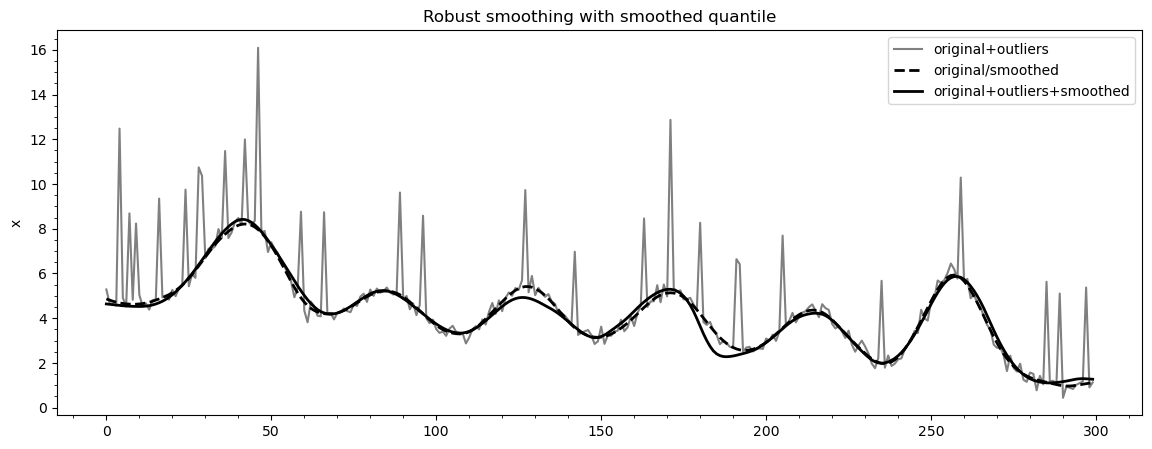

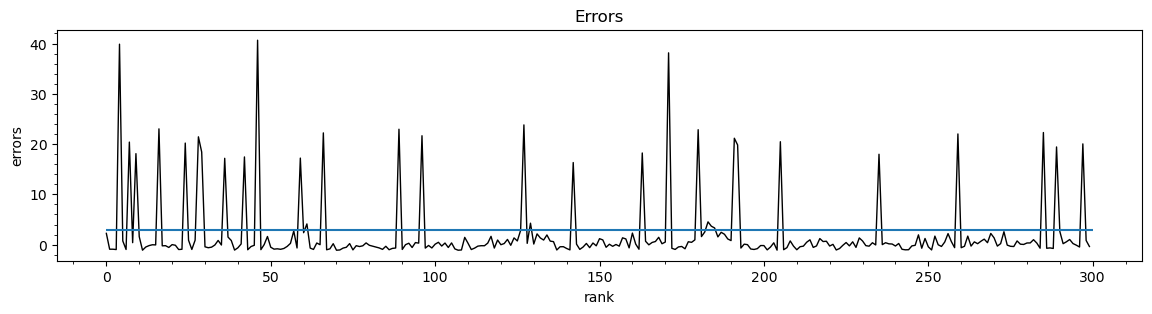

In [18]:
plt.figure(figsize=(14,5))
plt.title("Robust smoothing with smoothed quantile")
plt.plot(xs_o, linewidth=1.5, color='Gray', label='original+outliers')
plt.plot(zs, linewidth=2.0, color='k', linestyle='--', label='original/smoothed')
plt.plot(zs3, linewidth=2.0, color='k', label=r'original+outliers+smoothed')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.legend()
plt.show()

plt.figure(figsize=(14,3))
plt.title("Errors")
err = abs(xs_o-zs3)
ZS = array_transform.array_modified_zscore(err)
plt.plot(ZS, linewidth=1.0, color='k')
plt.hlines(alpha, 0, len(zs))
plt.ylabel('errors')
plt.xlabel('rank')
plt.minorticks_on()
plt.show()


In [19]:
xs1_o = xs_o.copy()
np.putmask(xs1_o, ZS >= alpha, zs3)
zs4 = smooth.whittaker_smooth(xs1_o, tau=tau, solver=solver)

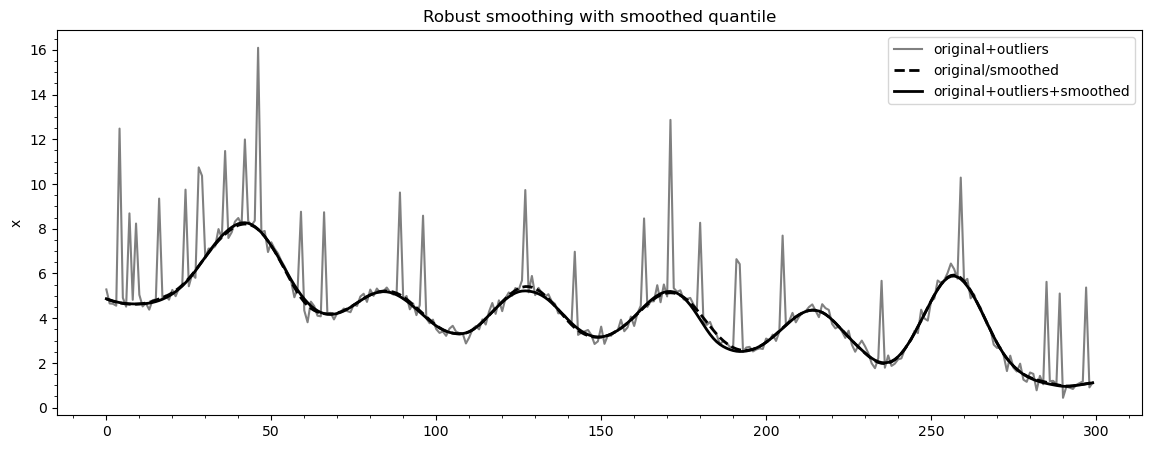

In [20]:
plt.figure(figsize=(14,5))
plt.title("Robust smoothing with smoothed quantile")
plt.plot(xs_o, linewidth=1.5, color='Gray', label='original+outliers')
plt.plot(zs, linewidth=2.0, color='k', linestyle='--', label='original/smoothed')
plt.plot(zs4, linewidth=2.0, color='k', label=r'original+outliers+smoothed')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.legend()
plt.show()
